# Movie Analysis for Microsoft

**Author:** Benjamin Dean
***

## Project Overview


This project explores six seperate datasets from IMDB.com, TheMovieDB.com, and the-numbers.com. Through analysis of this data 

### Business Problem

"Content is King"
Competitors Apple, Amazon and Netflix either create or secure original video content. In an effort to join them Microsoft has started their own movie studio. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 100)

#### Import datasets

In [2]:
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
directors = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
names = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
releases = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

#### Remove unwanted columns and rows

In [3]:
ratings = ratings.drop(ratings[ratings.numvotes < 100].index)
names = names[names['primary_profession'].str.contains('director', na=False)]
names.drop(columns = ['birth_year', 'death_year', 'known_for_titles'], inplace=True)
basics.drop(columns = ['original_title', 'runtime_minutes'], inplace=True)
directors.drop(columns = 'writers', inplace=True)
releases.drop(columns = ['genre_ids', 'id', 'original_language', 'popularity',\
                         'original_title', 'vote_average', 'vote_count'], inplace=True)

In [4]:
directors.rename(columns={'directors': 'nconst'}, inplace=True)
releases.rename(columns={'title': 'primary_title'}, inplace=True)
budgets.rename(columns={'movie': 'primary_title'}, inplace=True)

In [5]:
releases.release_date = pd.to_datetime(releases.release_date)
budgets.release_date = pd.to_datetime(budgets.release_date)

In [6]:
genres_by_ratings = pd.merge(ratings, basics, on='tconst')\
                      .merge(directors, on='tconst')\
                      .merge(names, on='nconst')\
                      .merge(releases, on='primary_title' )\
                      .merge(budgets, on=['primary_title', 'release_date'])

#### Remove unwanted characters in order to make values convertable to intergers

In [7]:
series_list = ['production_budget', 'domestic_gross', 'worldwide_gross']
for series in series_list:
    for symbol in ['$', ',']:
        genres_by_ratings[series] = genres_by_ratings[series].str.replace(symbol,'')
    genres_by_ratings[series] = pd.to_numeric(genres_by_ratings[series])

In [8]:
genres_by_ratings['genre'] = genres_by_ratings['genres'].str.split(',')
genres_by_ratings['genre'] = genres_by_ratings['genre'].str[0]

#### Add profit column

In [9]:
genres_by_ratings['profit'] = genres_by_ratings['worldwide_gross'] - genres_by_ratings['production_budget']

In [10]:
avg_genre_rating = genres_by_ratings.groupby('genre').mean()
avg_genre_rating.sort_values(by='averagerating', ascending=False)
forplot = avg_genre_rating.drop(columns=['numvotes', 'start_year'])

In [11]:
budgets.rename(columns={'movie': 'primary_title'}, inplace=True)

In [12]:
to_deviate = genres_by_ratings.genres.value_counts()
avg_of_mov = to_deviate.mean()
dev_of_mov = to_deviate.std()
avg_of_mov

6.0954773869346734

In [13]:
new_df = genres_by_ratings[genres_by_ratings.groupby('genres').genres.transform(len) >= 5]
new_df.genres.value_counts()

Drama                         65
Drama,Romance                 40
Comedy,Drama                  36
Action,Adventure,Sci-Fi       35
Comedy,Drama,Romance          34
Action,Adventure,Fantasy      30
Comedy                        30
Action,Crime,Drama            29
Comedy,Romance                25
Drama,Thriller                25
Action,Comedy,Crime           24
Crime,Drama,Thriller          24
Action,Adventure,Drama        23
Horror,Mystery,Thriller       23
Action,Adventure,Comedy       22
Horror,Thriller               22
Adventure,Animation,Comedy    22
Biography,Drama,History       20
Action,Thriller               19
Biography,Drama               18
Action,Crime,Thriller         17
Biography,Crime,Drama         16
Biography,Comedy,Drama        15
Crime,Drama,Mystery           14
Drama,Mystery,Thriller        13
Action,Drama,Thriller         13
Drama,Horror,Thriller         12
Crime,Drama                   12
Action,Adventure,Thriller     12
Drama,Horror,Mystery          12
Adventure,

In [14]:
genres_by_ratings = genres_by_ratings[genres_by_ratings.groupby('genres').genres.transform(len) >=5]
for_graph = genres_by_ratings.groupby('genres').mean()
for_graph = for_graph.loc[:,['production_budget', 'profit', 'worldwide_gross']]
for_graph.sort_values(by='profit', ascending=False, inplace=True)
#for_graph = pd.merge(for_graph, new_df, on='genres')
for_graph = for_graph.head(25)
for_graph

,production_budget,profit,worldwide_gross
genres,,,
"Action,Adventure,Sci-Fi",1.663886e+08,5.234292e+08,6.898177e+08
"Adventure,Family,Fantasy",1.606818e+08,3.744137e+08,5.350955e+08
"Action,Adventure,Comedy",1.102500e+08,3.537390e+08,4.639890e+08
"Action,Adventure,Animation",1.119286e+08,3.250726e+08,4.370011e+08
"Action,Adventure,Fantasy",1.470200e+08,2.519460e+08,3.989660e+08
"Action,Sci-Fi,Thriller",6.886786e+07,2.327691e+08,3.016370e+08
"Action,Adventure,Thriller",1.411667e+08,2.074254e+08,3.485921e+08
"Drama,Fantasy,Romance",4.301667e+07,1.954007e+08,2.384174e+08
"Adventure,Animation,Comedy",9.054545e+07,1.909669e+08,2.815124e+08


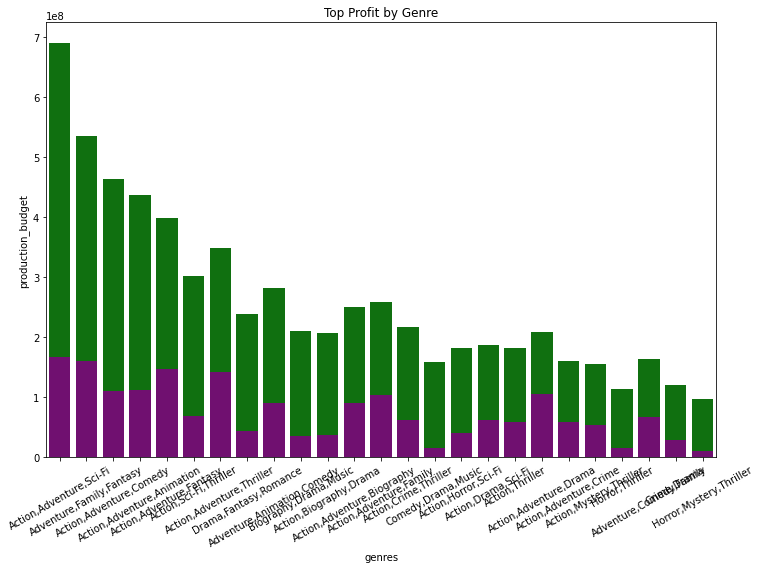

In [15]:
sns.set_context({'figure.figsize': (12,8)})
sns.barplot(x=for_graph.index, y=for_graph.worldwide_gross, color='green').set(title='Top Profit by Genre')
sns.barplot(x=for_graph.index, y=for_graph.production_budget, color='purple')
plt.xticks(rotation=30);

In [16]:
second_graph = genres_by_ratings.groupby('primary_name').mean()
second_graph = second_graph.loc[:, ['averagerating', 'profit']]
second_graph.sort_values(by='profit', ascending=False, inplace=True)
second_graph = second_graph.head(25)

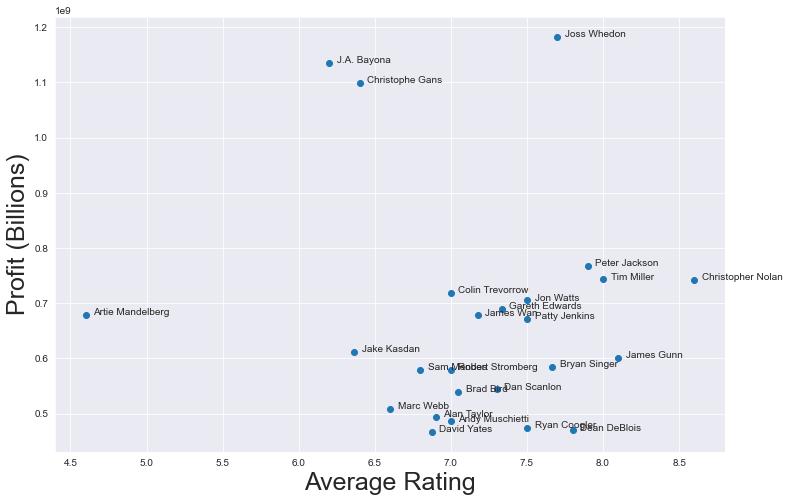

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
v = second_graph.averagerating
w = second_graph.profit
annotations = second_graph.index
plt.scatter(v,w)
plt.xlabel('Average Rating', fontsize=25)
plt.ylabel('Profit (Billions)', fontsize=25)
for i, label in enumerate(annotations):
    plt.annotate(label, (v.iloc[i]+.05, w.iloc[i]))
plt.show();

#### Ratings by Expenditure

In [21]:
genres_by_ratings.head()

,tconst,averagerating,numvotes,primary_title,start_year,genres,nconst,primary_name,primary_profession,release_date,id,production_budget,domestic_gross,worldwide_gross,genre,profit
0,tt1043726,4.2,50352,The Legend of Hercules,2014,"Action,Adventure,Fantasy",nm0001317,Renny Harlin,"producer,director,writer",2014-01-10,42,70000000,18848538,58953319,Action,-11046681
1,tt1171222,5.1,8296,Baggage Claim,2013,Comedy,nm0847859,David E. Talbert,"writer,director,producer",2013-09-27,38,8500000,21569509,22885836,Comedy,14385836
2,tt4649416,6.1,5212,Almost Christmas,2016,"Comedy,Drama",nm0847859,David E. Talbert,"writer,director,producer",2016-11-11,81,17000000,42065185,42493506,Comedy,25493506
3,tt2179136,7.3,401915,American Sniper,2014,"Action,Biography,Drama",nm0000142,Clint Eastwood,"actor,producer,director",2014-12-25,57,58000000,350126372,547326372,Action,489326372
4,tt2179136,7.3,401915,American Sniper,2014,"Action,Biography,Drama",nm0000142,Clint Eastwood,"actor,producer,director",2014-12-25,57,58000000,350126372,547326372,Action,489326372


In [23]:
third_graph = genres_by_ratings.loc[:, ['averagerating', 'production_budget', 'profit']]
third_graph['budget_grp'] = None
for element in range(len(third_graph.budget_grp)):
    if third_graph.production_budget.iloc[element] <= 25000000:
        third_graph.budget_grp.iloc[element] = '<=25'
    elif third_graph.production_budget.iloc[element] > 25000000 and third_graph.production_budget.iloc[element] <= 50000000:
        third_graph.budget_grp.iloc[element] = '<=50'
    elif third_graph.production_budget.iloc[element] > 50000000 and third_graph.production_budget.iloc[element] <= 75000000:
        third_graph.budget_grp.iloc[element] = '<=75'
    elif third_graph.production_budget.iloc[element] > 75000000 and third_graph.production_budget.iloc[element] <= 100000000:
        third_graph.budget_grp.iloc[element] = '<=100'
    elif third_graph.production_budget.iloc[element] > 100000000 and third_graph.production_budget.iloc[element] <= 125000000:
        third_graph.budget_grp.iloc[element] = '<=125'
    elif third_graph.production_budget.iloc[element] > 125000000 and third_graph.production_budget.iloc[element] <= 150000000:
        third_graph.budget_grp.iloc[element] = '<=150'
    elif third_graph.production_budget.iloc[element] > 150000000 and third_graph.production_budget.iloc[element] <= 175000000:
        third_graph.budget_grp.iloc[element] = '<=175'
    elif third_graph.production_budget.iloc[element] > 175000000 and third_graph.production_budget.iloc[element] <= 200000000:
        third_graph.budget_grp.iloc[element] = '<=200'
    else:
        third_graph.budget_grp.iloc[element] = '>200'

In [24]:
third_graph = third_graph.groupby('budget_grp').mean()

In [25]:
#plt.bar(t, u)
for symbol in ['<', '=', '>']:
    third_graph.index = third_graph.index.str.replace(symbol, '')
third_graph.index = pd.to_numeric(third_graph.index)
third_graph.sort_values(by='budget_grp')

,averagerating,production_budget,profit
budget_grp,,,
25,6.217969,1.083563e+07,2.418234e+07
50,6.403125,3.719727e+07,6.251479e+07
75,6.267021,6.181489e+07,1.054197e+08
100,6.132836,8.994030e+07,1.579318e+08
125,6.527778,1.150278e+08,2.508103e+08
150,6.539024,1.384878e+08,2.434726e+08
175,6.853846,1.654615e+08,4.635029e+08
200,7.103125,1.896562e+08,4.716546e+08
200,6.857143,2.603905e+08,6.378738e+08


<AxesSubplot:xlabel='budget_grp', ylabel='averagerating'>

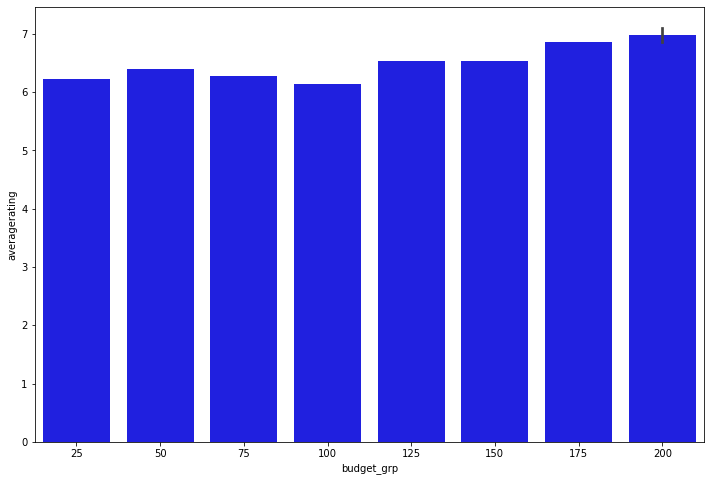

In [26]:
sns.set_context({'figure.figsize': (12,8)})
sns.barplot(x=third_graph.index, y=third_graph.averagerating, color='blue')